# Step 1: Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image 
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
skin_CD = pd.read_csv("HAM10000_metadata.csv")

In [3]:
skin_CD

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

 # Step 2:Making Dictionary of images and labels

In [4]:
project_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('C:/Users/Mitej/HAM10000/','*','*.jpg'))}

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

 # Step 3:Reading and Processing Data

In [6]:
skin_CD = pd.read_csv(os.path.join('C:/Users/Mitej/HAM10000/','C:/Users/Mitej/HAM10000/HAM10000_metadata.csv'))

In [7]:
skin_CD['route'] = skin_CD['image_id'].map(project_path_dict.get)
skin_CD['skin_type'] = skin_CD['dx'].map(lesion_type_dict.get) 
skin_CD['skin_type_idx'] = pd.Categorical(skin_CD['skin_type']).codes

In [8]:
skin_CD.head(n = 10)

lesion_id      image_id   dx dx_type   age     sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear   
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear   
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face   
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face   
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back   
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back   

                                               route  \
0  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
1  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
2  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
3  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
4  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
5  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
6  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
7  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
8  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
9  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   

                        skin_type  skin_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2  
5  Benign keratosis-like lesions               2  
6  Benign keratosis-like lesions               2  
7  Benign keratosis-like lesions               2  
8  Benign keratosis-like lesions               2  
9  Benign keratosis-like lesions               2

In [9]:
skin_CD.tail(n = 10)

lesion_id      image_id     dx dx_type   age     sex  \
10005  HAM_0005579  ISIC_0028393  akiec   histo  80.0    male   
10006  HAM_0004034  ISIC_0024948  akiec   histo  55.0  female   
10007  HAM_0001565  ISIC_0028619  akiec   histo  60.0  female   
10008  HAM_0001576  ISIC_0033705  akiec   histo  60.0    male   
10009  HAM_0005705  ISIC_0031430  akiec   histo  75.0  female   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female   

          localization                                              route  \
10005             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
10006             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
10007             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
10008             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10009  lower extremity  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10010          abdomen  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10011          abdomen  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10012          abdomen  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10013             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10014             back  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   

               skin_type  skin_type_idx  
10005  Actinic keratoses              0  
10006  Actinic keratoses              0  
10007  Actinic keratoses              0  
10008  Actinic keratoses              0  
10009  Actinic keratoses              0  
10010  Actinic keratoses              0  
10011  Actinic keratoses              0  
10012  Actinic keratoses              0  
10013  Actinic keratoses              0  
10014           Melanoma              5

 # Step 4: Data Cleaning

In [10]:
skin_CD.shape

(10015, 10)

In [11]:
print(skin_CD.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
route             object
skin_type         object
skin_type_idx       int8
dtype: object


In [12]:
skin_CD.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
route             0
skin_type         0
skin_type_idx     0
dtype: int64

In [13]:
skin_CD['age'].fillna((skin_CD['age'].mean()), inplace=True)

In [14]:
skin_CD.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
route            0
skin_type        0
skin_type_idx    0
dtype: int64

 # Step 5: Explotary Data Analysis

In [15]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sex', 'Localisation', 'Age', 'Skin Type'],
                    vertical_spacing=0.15,
                    column_widths=[0.4, 0.6])

fig.add_trace(go.Bar(
            x=skin_CD['sex'].value_counts().index, 
            y=skin_CD['sex'].value_counts()),
            row=1, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['localization'].value_counts().index, 
            y=skin_CD['localization'].value_counts()),
            row=1, col=2)
fig.add_trace(go.Histogram(
            x=skin_CD['age']),
            row=2, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['dx'].value_counts().index.map(lesion_type_dict.get), 
            y=skin_CD['dx'].value_counts()),
            row=2, col=2)


for i in range(4):
    fig.update_yaxes(title_text='Count', row=i//2+1, col=i%2+1)
fig.update_layout(title='Distribution of Data', height=800)

fig.show()

Text(0.5, 1.0, 'Diagnosis Test Type: Distribution Plot')

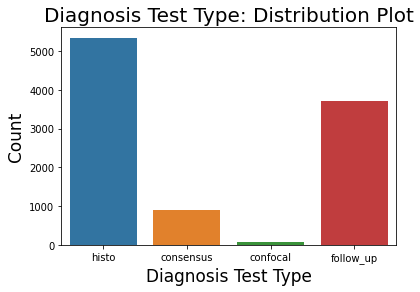

In [16]:
sns.countplot(x = "dx_type", data = skin_CD)
plt.xlabel("Diagnosis Test Type", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.title("Diagnosis Test Type: Distribution Plot", fontsize=20)

# Step 6:Oversampling

In [17]:
skin_CD.skin_type_idx.value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: skin_type_idx, dtype: int64

In [18]:
class_4,class_5,class_2,class_1,class_0,class_6,class_3 = skin_CD.skin_type_idx.value_counts()

skin_class_0 = skin_CD[skin_CD['skin_type_idx'] == 0]
skin_class_1 = skin_CD[skin_CD['skin_type_idx'] == 1]
skin_class_2 = skin_CD[skin_CD['skin_type_idx'] == 2]
skin_class_3 = skin_CD[skin_CD['skin_type_idx'] == 3]
skin_class_4 = skin_CD[skin_CD['skin_type_idx'] == 4]
skin_class_5 = skin_CD[skin_CD['skin_type_idx'] == 5]
skin_class_6 = skin_CD[skin_CD['skin_type_idx'] == 6]

In [19]:
class_0,class_1,class_2,class_3,class_4,class_5,class_6

(327, 514, 1099, 115, 6705, 1113, 142)

In [20]:
skin_class_0.shape

(327, 10)

In [21]:
skin_class_1.shape

(514, 10)

In [22]:
skin_class_2.shape

(1099, 10)

In [23]:
skin_class_3.shape

(115, 10)

In [24]:
skin_class_4.shape

(6705, 10)

In [25]:
skin_class_5.shape

(1113, 10)

In [26]:
skin_class_6.shape

(142, 10)

In [27]:
skin_class_0_over = skin_class_0.sample(class_4,replace = True)

In [28]:
skin_class_0_over.shape

(6705, 10)

In [29]:
skin_class_1_over = skin_class_1.sample(class_4,replace = True)

In [30]:
skin_class_1_over.shape

(6705, 10)

In [31]:
skin_class_2_over = skin_class_2.sample(class_4,replace = True)

In [32]:
skin_class_2_over.shape

(6705, 10)

In [33]:
skin_class_3_over = skin_class_3.sample(class_4,replace = True)

In [34]:
skin_class_3_over.shape

(6705, 10)

In [35]:
skin_class_5_over = skin_class_5.sample(class_4,replace = True)

In [36]:
skin_class_5_over.shape

(6705, 10)

In [37]:
skin_class_6_over = skin_class_6.sample(class_4,replace = True)

In [38]:
skin_class_6_over.shape

(6705, 10)

In [39]:
skin_CD_test_over = pd.concat([skin_class_0_over,skin_class_1_over,skin_class_2_over,skin_class_3_over
                               ,skin_class_4,skin_class_5_over,skin_class_6_over], axis = 0)

In [40]:
skin_CD_test_over.shape

(46935, 10)

In [41]:
print('Random over-sampling:')
print(skin_CD_test_over.skin_type_idx.value_counts())

Random over-sampling:
0    6705
1    6705
2    6705
3    6705
4    6705
5    6705
6    6705
Name: skin_type_idx, dtype: int64


#  Step 7:Loading and Resizing of Images

In [42]:
skin_CD_test_over['image'] = skin_CD_test_over['route'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [45]:
skin_CD_test_over.head()

lesion_id      image_id     dx dx_type   age     sex localization  \
9809  HAM_0002734  ISIC_0028190  akiec   histo  45.0    male         face   
9831  HAM_0001460  ISIC_0025637  akiec   histo  75.0    male         face   
9700  HAM_0002615  ISIC_0033456  akiec   histo  70.0    male        scalp   
9890  HAM_0007349  ISIC_0026178  akiec   histo  60.0    male         back   
9713  HAM_0001621  ISIC_0030297  akiec   histo  70.0  female         face   

                                                  route          skin_type  \
9809  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...  Actinic keratoses   
9831  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...  Actinic keratoses   
9700  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...  Actinic keratoses   
9890  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...  Actinic keratoses   
9713  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...  Actinic keratoses   

      skin_type_idx                                              image  
9809              0  [[[196, 138, 128], [197, 135, 125], [197, 134,...  
9831              0  [[[144, 107, 101], [143, 107, 99], [146, 109, ...  
9700              0  [[[182, 144, 154], [183, 145, 154], [182, 144,...  
9890              0  [[[154, 113, 118], [159, 121, 127], [168, 131,...  
9713              0  [[[34, 8, 16], [43, 12, 18], [61, 19, 21], [84...

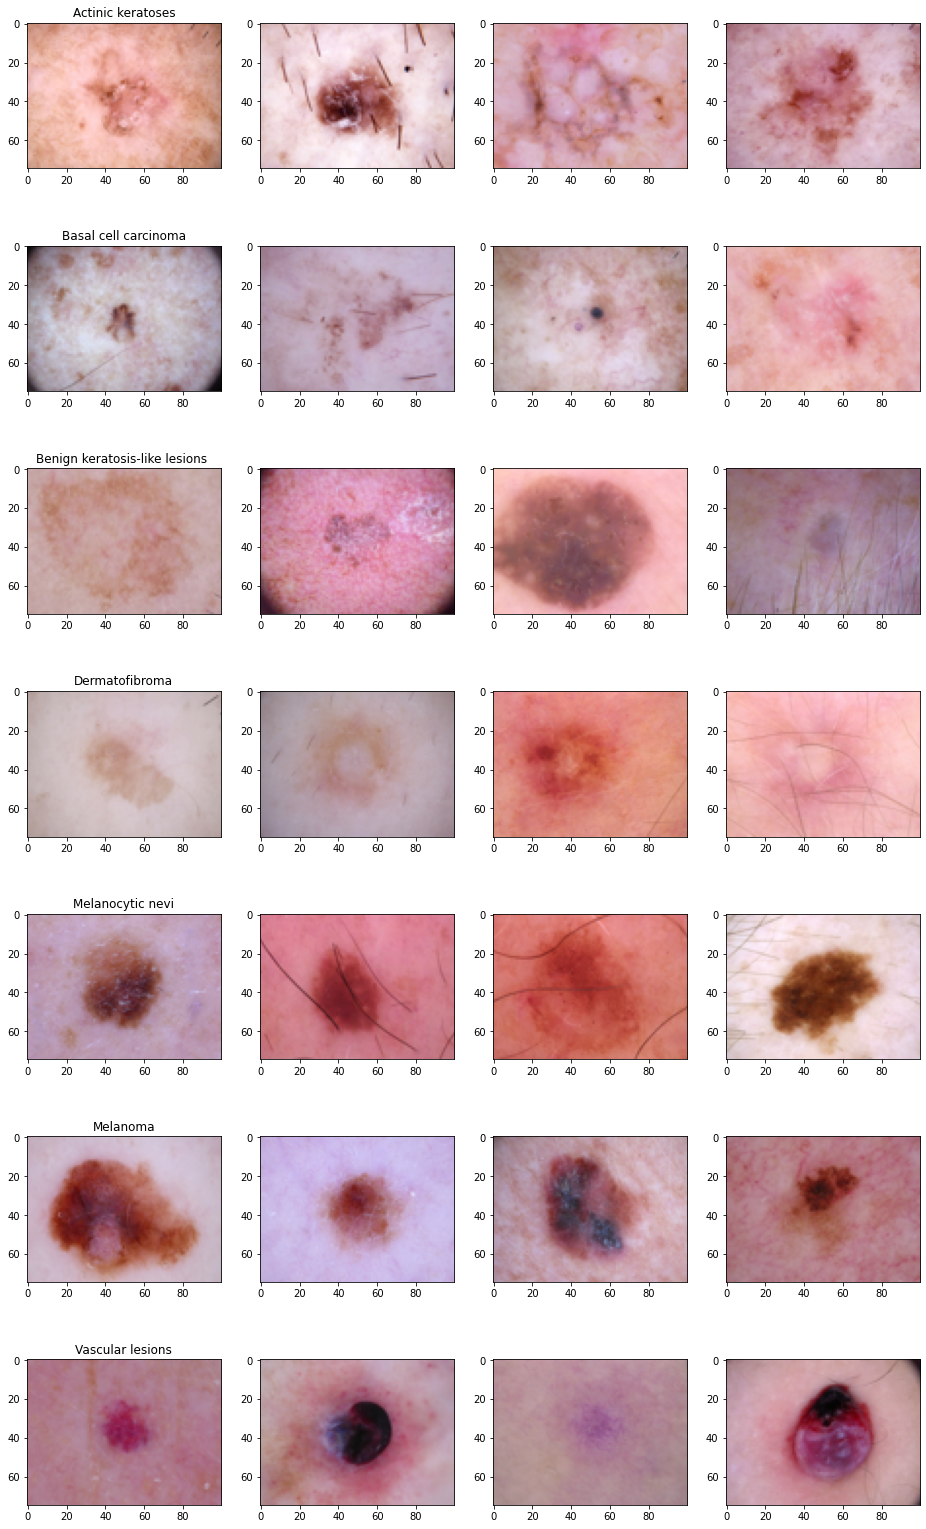

In [46]:
n_samples = 4
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 4*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_CD_test_over.sort_values(['skin_type']).groupby('skin_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('on')
fig.savefig('samples.png', dpi=300)

# Step 8: Selection of Depended and Independed Variables


In [43]:
features=skin_CD_test_over.drop(columns=['skin_type_idx','dx','skin_type'],axis=1)
target=skin_CD_test_over['skin_type_idx']

 # Step 9: Train and Test Data Splitting

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=1234, stratify = target)

In [49]:
x_train.head()

lesion_id      image_id    dx_type   age     sex     localization  \
2360  HAM_0000940  ISIC_0032692      histo  35.0  female  lower extremity   
2272  HAM_0002591  ISIC_0028930      histo  55.0  female  lower extremity   
2218  HAM_0004936  ISIC_0029705      histo  80.0    male            chest   
9773  HAM_0004384  ISIC_0030826      histo  70.0    male             face   
6006  HAM_0007143  ISIC_0028841  follow_up  50.0    male  upper extremity   

                                                  route  \
2360  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
2272  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
2218  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
9773  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
6006  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   

                                                  image  
2360  [[[219, 172, 179], [224, 175, 184], [224, 177,...  
2272  [[[200, 167, 169], [200, 168, 169], [200, 168,...  
2218  [[[163, 130, 122], [163, 131, 126], [165, 134,...  
9773  [[[215, 161, 156], [214, 161, 156], [213, 153,...  
6006  [[[236, 145, 157], [234, 145, 155], [237, 148,...

In [50]:
x_test.head()

lesion_id      image_id    dx_type   age     sex     localization  \
2404  HAM_0002498  ISIC_0032932  consensus  70.0    male             back   
4925  HAM_0004855  ISIC_0026642  follow_up  50.0    male             back   
2936  HAM_0003444  ISIC_0028687      histo  80.0  female  lower extremity   
9959  HAM_0004655  ISIC_0030463      histo  70.0  female             face   
913   HAM_0003787  ISIC_0030630  consensus  70.0    male            chest   

                                                  route  \
2404  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
4925  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
2936  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
9959  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
913   C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   

                                                  image  
2404  [[[144, 96, 92], [151, 102, 100], [152, 96, 88...  
4925  [[[220, 148, 168], [222, 149, 170], [222, 151,...  
2936  [[[169, 119, 118], [172, 122, 124], [174, 124,...  
9959  [[[152, 95, 77], [153, 96, 78], [150, 90, 75],...  
913   [[[219, 175, 184], [218, 175, 185], [217, 176,...

In [52]:
y_train.value_counts()

6    5364
5    5364
0    5364
4    5364
2    5364
3    5364
1    5364
Name: skin_type_idx, dtype: int64

In [53]:
y_test.value_counts()

6    1341
4    1341
1    1341
0    1341
2    1341
5    1341
3    1341
Name: skin_type_idx, dtype: int64

 # Step 10:Normalization

In [ ]:
x_train = x_train['image'].tolist()


x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)


x_train = (x_train - x_train_mean)/x_train_std


In [ ]:
print('Train min=%.3f, max=%.3f' % (x_train.min(), x_train.max()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


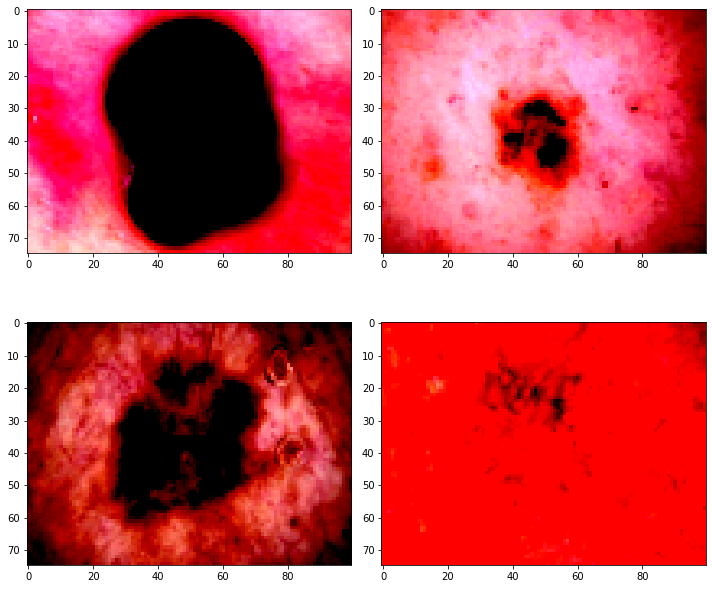

In [58]:
fig, (ax) = plt.subplots(2, 2, figsize = (10, 10))
k = 0 
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_train[k])
        ax[i,j].axis('on')
        k = k + 1  
    plt.tight_layout()

 # Step 11: Label Encoding

In [ ]:
y_train = to_categorical(y_train, num_classes = 7)
y_test= to_categorical(y_test, num_classes = 7)

In [60]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [61]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


 # Step 12: Model Building

In [5]:
#Initialization of CNN
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (75, 100, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 100, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 37, 50, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 48, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 46, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 23, 64)       0

# Step 13: Define the Optimizer,Compile the Model,Set the Learning rate,Data Augmentation

In [63]:
optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [64]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [66]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(x_train)

 # Step 14: Fitting the model

In [68]:
epochs = 75
batch_size = 64
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size),
                             epochs = epochs,
                             verbose = 1, steps_per_epoch = x_train.shape[0] // batch_size,
                             callbacks = [learning_rate_reduction])

Epoch 1/75
586/586 [==============================] - 356s 593ms/step - loss: 1.4695 - accuracy: 0.4164 - lr: 0.0100
Epoch 2/75
586/586 [==============================] - 340s 581ms/step - loss: 1.1338 - accuracy: 0.5675 - lr: 0.0100
Epoch 3/75
586/586 [==============================] - 338s 577ms/step - loss: 0.9608 - accuracy: 0.6410 - lr: 0.0100
Epoch 4/75
586/586 [==============================] - 338s 576ms/step - loss: 0.8404 - accuracy: 0.6882 - lr: 0.0100
Epoch 5/75
586/586 [==============================] - 338s 577ms/step - loss: 0.7492 - accuracy: 0.7234 - lr: 0.0100
Epoch 6/75
586/586 [==============================] - 342s 583ms/step - loss: 0.6611 - accuracy: 0.7567 - lr: 0.0100
Epoch 7/75
586/586 [==============================] - 337s 575ms/step - loss: 0.6074 - accuracy: 0.7745 - lr: 0.0100
Epoch 8/75
586/586 [==============================] - 336s 573ms/step - loss: 0.5430 - accuracy: 0.7990 - lr: 0.0100
Epoch 9/75
586/586 [==============================] - 336s 573ms

Epoch 25/75
586/586 [==============================] - 333s 569ms/step - loss: 0.1822 - accuracy: 0.9337 - lr: 0.0100
Epoch 26/75
586/586 [==============================] - 333s 568ms/step - loss: 0.1800 - accuracy: 0.9352 - lr: 0.0100
Epoch 27/75
586/586 [==============================] - 333s 567ms/step - loss: 0.1676 - accuracy: 0.9400 - lr: 0.0100
Epoch 28/75
586/586 [==============================] - 333s 567ms/step - loss: 0.1607 - accuracy: 0.9429 - lr: 0.0100
Epoch 29/75
586/586 [==============================] - 333s 568ms/step - loss: 0.1546 - accuracy: 0.9447 - lr: 0.0100
Epoch 30/75
586/586 [==============================] - 333s 568ms/step - loss: 0.1452 - accuracy: 0.9480 - lr: 0.0100
Epoch 31/75
586/586 [==============================] - 332s 567ms/step - loss: 0.1413 - accuracy: 0.9502 - lr: 0.0100
Epoch 32/75
586/586 [==============================] - 333s 568ms/step - loss: 0.1372 - accuracy: 0.9512 - lr: 0.0100
Epoch 33/75
586/586 [==============================] - 3

Epoch 49/75
586/586 [==============================] - 334s 571ms/step - loss: 0.0806 - accuracy: 0.9733 - lr: 0.0100
Epoch 50/75
586/586 [==============================] - 334s 570ms/step - loss: 0.0801 - accuracy: 0.9720 - lr: 0.0100
Epoch 51/75
586/586 [==============================] - 334s 569ms/step - loss: 0.0807 - accuracy: 0.9714 - lr: 0.0100
Epoch 52/75
586/586 [==============================] - 334s 570ms/step - loss: 0.0764 - accuracy: 0.9733 - lr: 0.0100
Epoch 53/75
586/586 [==============================] - 333s 569ms/step - loss: 0.0732 - accuracy: 0.9747 - lr: 0.0100
Epoch 54/75
586/586 [==============================] - 334s 569ms/step - loss: 0.0707 - accuracy: 0.9761 - lr: 0.0100
Epoch 55/75
586/586 [==============================] - 334s 570ms/step - loss: 0.0701 - accuracy: 0.9759 - lr: 0.0100
Epoch 56/75
586/586 [==============================] - 333s 569ms/step - loss: 0.0714 - accuracy: 0.9762 - lr: 0.0100
Epoch 57/75
586/586 [==============================] - 3

Epoch 73/75
586/586 [==============================] - 332s 566ms/step - loss: 0.0471 - accuracy: 0.9840 - lr: 0.0100
Epoch 74/75
586/586 [==============================] - 332s 567ms/step - loss: 0.0489 - accuracy: 0.9844 - lr: 0.0100
Epoch 75/75
586/586 [==============================] - 332s 567ms/step - loss: 0.0491 - accuracy: 0.9835 - lr: 0.0100


 # Step 15: Model Testing and Model Evaluation

In [69]:
x_test = x_test['image'].tolist()

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_test = (x_test - x_test_mean)/x_test_std

In [70]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 1)
print("Test: Accuracy = %f ; loss_v = %f" %(accuracy, loss))
model.save("model_75_64.h5")

294/294 [==============================] - 20s 63ms/step - loss: 11.8235 - accuracy: 0.9802
Test: Accuracy = 0.980185 ; loss_v = 11.823505


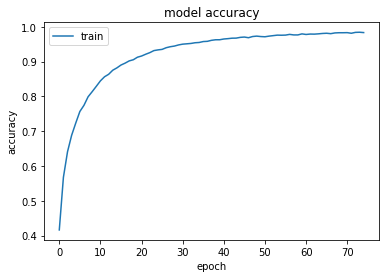

In [71]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

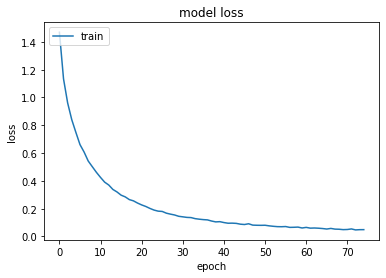

In [72]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

 # Step 16: Confusion Matrix

In [73]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#The number of correct and incorrect predictions are summarized with count values and broken down by each class in a confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification report for classifier <keras.engine.sequential.Sequential object at 0x000001CEE177B1F0>:
                                precision    recall  f1-score   support

              Melanocytic nevi       1.00      1.00      1.00      1341
                      Melanoma       0.99      1.00      1.00      1341
Benign keratosis-like lesions        0.96      1.00      0.98      1341
          Basal cell carcinoma       1.00      1.00      1.00      1341
             Actinic keratoses       1.00      0.87      0.93      1341
              Vascular lesions       0.92      1.00      0.96      1341
                Dermatofibroma       1.00      1.00      1.00      1341

                      accuracy                           0.98      9387
                     macro avg       0.98      0.98      0.98      9387
                  weighted avg       0.98      0.98      0.98      9387




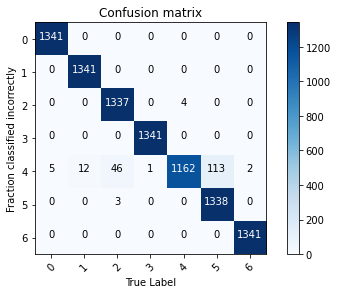

In [75]:
from sklearn import metrics
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))

 # Step 17: Predicting Result

In [ ]:
model = tf.keras.models.load_model("model_75_64.h5")

In [78]:
pred = model.predict(x_test)

In [79]:
lesion_type_dict = {
    4: 'Melanocytic nevi',
    5: 'Melanoma',
    2: 'Benign keratosis-like lesions ',
    1: 'Basal cell carcinoma',
    0: 'Actinic keratoses',
    6: 'Vascular lesions',
    3: 'Dermatofibroma'
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


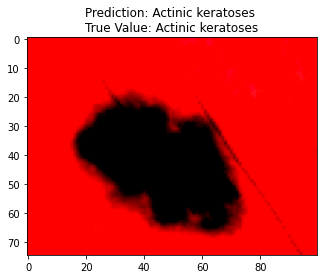

In [80]:
import matplotlib.pyplot as plt
plt.imshow(x_test[11].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[11])], lesion_type_dict[np.argmax(y_test[11])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


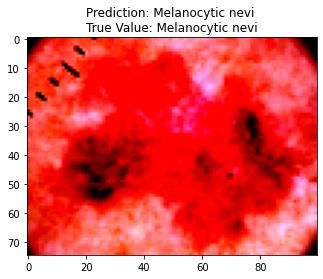

In [81]:
plt.imshow(x_test[13].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[13])], lesion_type_dict[np.argmax(y_test[13])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


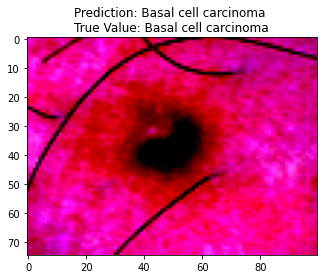

In [82]:
import matplotlib.pyplot as plt
plt.imshow(x_test[14].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[14])], lesion_type_dict[np.argmax(y_test[14])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


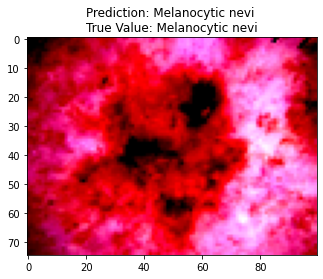

In [83]:
import matplotlib.pyplot as plt
plt.imshow(x_test[7].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[7])], lesion_type_dict[np.argmax(y_test[7])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


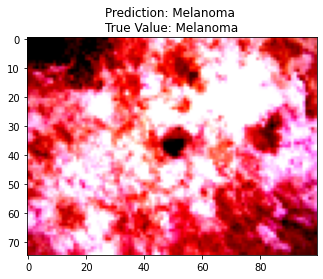

In [84]:
import matplotlib.pyplot as plt
plt.imshow(x_test[28].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[28])], lesion_type_dict[np.argmax(y_test[28])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


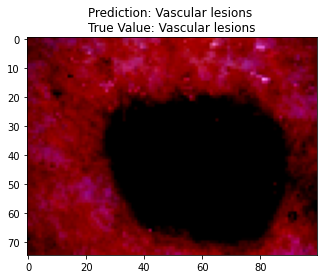

In [85]:
import matplotlib.pyplot as plt
plt.imshow(x_test[69].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[69])], lesion_type_dict[np.argmax(y_test[69])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


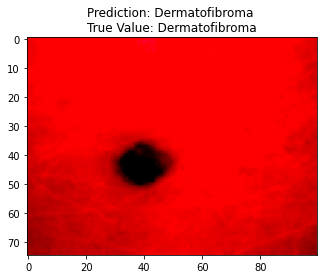

In [88]:
import matplotlib.pyplot as plt
plt.imshow(x_test[751].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[751])], lesion_type_dict[np.argmax(y_test[751])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


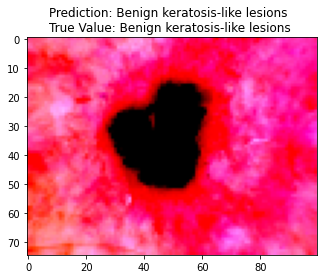

In [95]:
import matplotlib.pyplot as plt
plt.imshow(x_test[4].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[4])], lesion_type_dict[np.argmax(y_test[4])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


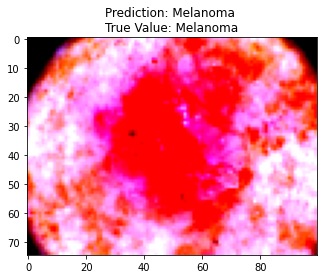

In [249]:
import matplotlib.pyplot as plt
plt.imshow(x_test[513].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[513])], lesion_type_dict[np.argmax(y_test[513])]))
plt.show()